# Assessed Problems 5



***
## Q1) Plotting the normal distribution [1 mark]

Plot two normal distributions with the means, $\mu$ = $\pm$ $\pi$ and the standard deviation $\sigma$ = $\sqrt{2}$ between x=-10 and x=10.


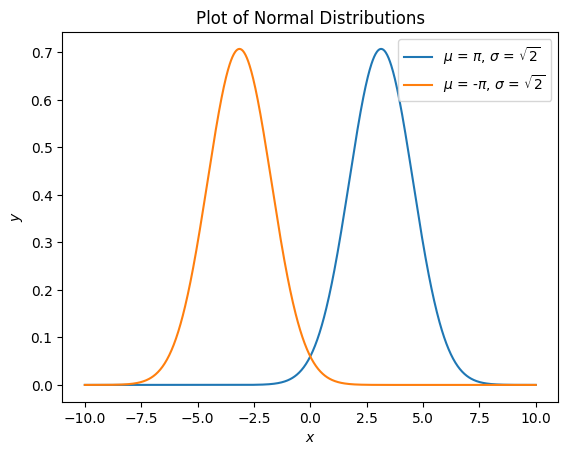

In [1]:
import numpy as np;
from matplotlib import pyplot as mpl;

# Defining constants
sigma = np.sqrt(2);
mu1 = np.pi;
mu2 = -1 * np.pi;

# This is the normal distribution function with parameters x, sigma and mu
def NormalDistribution(x, sigma, mu):
    y = (1 / sigma) * np.exp(-1 * (1/2) * (((x - mu) / sigma) ** 2)); 
    return (y);

# Defining the x coordinates and the lines
x = np.linspace(-10,10, 1000);
mpl.plot(x, NormalDistribution(x, sigma, mu1), label = r"$\mu$ = $\pi$, $\sigma$ = $\sqrt{2}$");
mpl.plot(x, NormalDistribution(x, sigma, mu2), label = r"$\mu$ = -$\pi$, $\sigma$ = $\sqrt{2}$");

# Adding graph labels etc.
mpl.xlabel("$ x $");
mpl.ylabel("$ y $");
mpl.title("Plot of Normal Distributions");
mpl.legend();

# Show the completed graph
mpl.show();

***
## Q2) Hertzprung-Russell Diagram [4 marks]

For this exercise you will need the ... data file. The file is the Yale Trigonometric Parallax Dataset observational data of stars and contains the following columns: 

column 1: star ID number
column 2: apparent V magnitude
column 3: observed B-V colour
column 4: observed parallax (in arcsec)
column 5: uncertainty in parallax (in milliarcsec)

A well known Hertzprung-Russell Diagram plots absolute magnitude vs temperature (in Kelvin) with the brightest stars at the top and the bluest stars to the left.

a) Read in the data file and the assign columns 2,3 and 4 to appropriately named variables.

b) To plot the HR diagram you need absolute magnitiude $M$ of a star, which is defined as the apparent magnitude it would have as seen from a distance of $10$ parsecs or $33$ light-years ($1$ parsec = $3.2616$ light-years). 

To calculate the absolute magnitude we can use this formula in terms of the apparent magnitude $m$ and the distance to the star $d$ in parsecs:

$${\displaystyle M=m-5\log _{10}(d_{\text{pc}})+5=m-5\left(\log _{10}d_{\text{pc}}-1\right),}$$

However, the data set does not record the distance and instead provides the observed parallax. Stella parallax can be used to calculate the distance and by using simple trigonometry is can be shown that

$$ {\displaystyle d{\text{ (pc)}}\approx 1/p{\text{ (arcsec)}}.}$$

<!-- To calculate the absolute magnitude $\displaystyle M=m+5\left(\log _{10}p+1\right),$ -->

Calulate the absolute magnitude for all stars in the data set and store the results in a new array.

c) The surface temperature of a star determines the colour of light it emits. Blue stars are hotter than yellow stars, which are hotter than red stars. For black bodies, Planck's radiation law, shows that with increasing temperature, the total radiated energy of a body increases and the peak of the emitted spectrum shifts to shorter wavelengths. Therefore, we can, in principle use the colour spectrum of a star to determine temperatur. Unfortunately the colour spectrum can be impractile to measure so instead artonomers measure a simpler quantity called the colour index. The B-V colour index in the data set is calculated by mesuring the the magnitude of the star in a blue (B) filter minus the magnitude of the star in a green (V) filter. $B-V = 0$ is calibrated to the hot star Vega. $B-V<0$ are hot stars. $B-V>0$ are cool stars. For example, for a star with B = 6.7 and V = 8.2, the magnitude in the B filter is brighter than the magnitude in the V filter, and B - V = -1.5. Magnitudes are logarithmic, so a difference in magnitudes (B-V) corresponds to a ratio of fluxes $F(V)/F(B)$ (and note the inverse nature of the ratio). A good approximation for the conversion between B-V colour index and temperature in Kelvin is found by using Ballesteros' formula:

$${\displaystyle T=4600\,\mathrm {K} \left({\frac {1}{0.92\;(B{\text{-}}\!V)+1.7}}+{\frac {1}{0.92\;(B{\text{-}}\!V)+0.62}}\right).}$$

This is also implemented in the python package, PyAstronomy (see https://pyastronomy.readthedocs.io/en/latest/pyaslDoc/aslDoc/aslExt_1Doc/ramirez2005.html). Using the B-V colour data in the file, calculate an approximate temperature for each star. Save the result to an array.

d) Plot absolute magnitude $M$ on the $y$-axis vs temperature $T$ on the $x$-axis being careful that the brightest stars are at the top and the bluest stars are to the left.


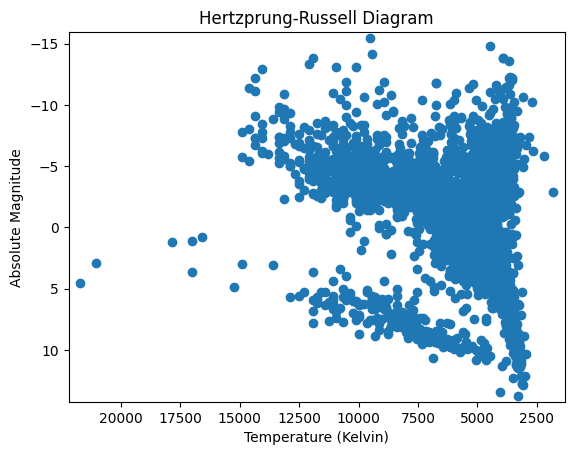

In [2]:
import numpy as np;
from matplotlib import pyplot as mpl;
# I would import pyrecord to allow me to store each star's data as a record but I will assume that school computers do not have this installed.

# Load the data from the file
path = "data/yaletrigplx.dat";
data = np.loadtxt(path);

# Defining lists taken from the imported data
#starIds = data[:,0];
apparentVMagnitudes = data[:,1];
observedBMinusVColourIndexes = data[:,2];
observedParalaxes = data[:,3];
#uncertaintyInParalaxes = data[:,4];

# Processing the imported data
distances = 1 / observedParalaxes;
absoluteMagnitudes = apparentVMagnitudes - 5 * np.log10(distances - 1);
temperatures = 4600 * (1 / (0.92 * observedBMinusVColourIndexes + 1.7) + 1 / (0.92 * observedBMinusVColourIndexes + 0.62))

# If provided with the colours of the stars, you could provide each point a colour by setting c in the scatter graph.
# This also could be achieved by calculating the peak wavelengths using the temperatures and then converting those into rgb values.
mpl.scatter(temperatures, absoluteMagnitudes)

# This makes the graph have the correct x and y axis direction and have all the points neatly within the boundaries of the graph.
mpl.xlim(max(temperatures) + 500, min(temperatures) - 500);
mpl.ylim(max(absoluteMagnitudes) + 0.5, min(absoluteMagnitudes) - 0.5);

# Adding graph labels
mpl.xlabel("Temperature (Kelvin)")
mpl.ylabel("Absolute Magnitude")
mpl.title("Hertzprung-Russell Diagram")

# Show the completed graph
mpl.show()

***
## Q3) Point Charges [3 marks]


If a free charged particle is placed at position ${\bf r}_i$ in a distribution of charges, the force on the particle is given by Coulomb's law:

$$
{\bf F}_i= \sum_j \frac{q_i q_j}{4 \pi \varepsilon_0} \frac{\hat{{\bf r}}_{ij}}{\left|{\bf r}_{ij}\right|^2}
$$

where ${\bf F}_i$ is the force on the free particle, $q_i$ is the charge of the free particle, $q_j$ is the charge of the point charge $j$, ${\bf r}_{ij}$ is the vector ${\bf r}_i - {\bf r}_j$, and $\varepsilon_0$ is the permittivity of free space.

Places four charges at the four corners of a square $(1,1),(-1,1),(-1,-1),(1,-1)$.

a) Now calculate the force felt by the charge $q_i$ at a position $(0.25, 0.5)$. Check the direction of the force vector matches your intuition.

b) Now choose a suitably fine grid of points and plot the vector field of force on the charge $q_i$. What is the force on $q_i$? Is it stable to small displacements from the origin? Try investigating the region very near the origin.

c) How about if we just have two symmetric charges (say [-1,-1] and [1,1])?

In [3]:
# Part a

import numpy as np;
from matplotlib import pyplot as mpl;

e = 1.60217663E-19; # magnitude of charge of an electron
epsilon0 = 8.8541878128E-12; # permittivity of free space

# Defining the charges that exist in the space in the format [[x, y], charge]
# x and y would have been stored together as a tuple however np.array considers it to be hence non-consistent dimensions
charges = np.array([[1, 1, e], [-1, 1, e], [-1, -1, e], [1, -1, e]]);

# Defining constants to calculate the force on a free particle at a point in space
qi = e;
ri = [0.25, 0.5];

rij_x = ri[0] - charges[:, 0];
rij_y = ri[1] - charges[:, 1];

rij_magnitude = np.sqrt(rij_x ** 2 + rij_y ** 2);

rij_x_normalised = rij_x / rij_magnitude;
rij_y_normalised = rij_y / rij_magnitude;

# Defining the force on a free particle at a point in space
Fi_x = sum(((qi * charges[:, 2]) / (4 * np.pi * epsilon0)) * (rij_x_normalised / (rij_magnitude ** 2)));
Fi_y = sum(((qi * charges[:, 2]) / (4 * np.pi * epsilon0)) * (rij_y_normalised / (rij_magnitude ** 2)));

print (Fi_x)
print (Fi_y)

-1.1602084339266938e-28
-8.492212025067508e-29


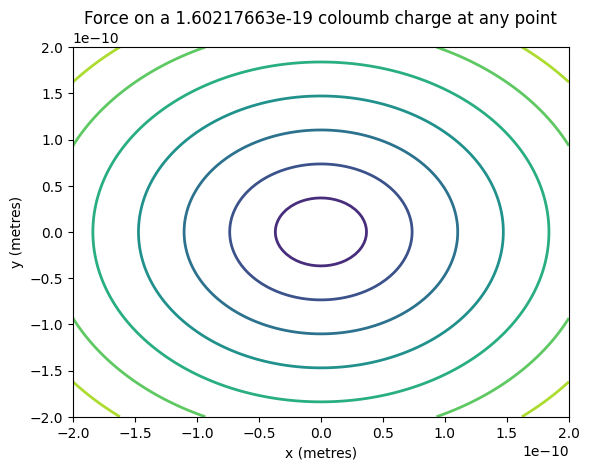

In [6]:
# Part b

import numpy as np;
from matplotlib import pyplot as mpl;

e = 1.60217663E-19; # magnitude of charge of an electron
epsilon0 = 8.8541878128E-12; # permittivity of free space

# Defining the charges that exist in the space in the format [[x, y], charge]
# x and y would have been stored together as a tuple however np.array considers it to be hence non-consistent dimensions
charges = np.array([[1, 1, e], [-1, 1, e], [-1, -1, e], [1, -1, e]]);

# Defining the x and y points
N = 101;
x = np.linspace(-2E-10, 2E-10, N);
y = np.linspace(-2E-10, 2E-10, N);

# Defining the 2D grid
xx, yy = np.meshgrid(x, y);

# Calculating each vector field created by each charge
qi = e;
Fi_x_List = [];
Fi_y_List = [];
for charge in charges:
    rij_x = xx - charge[0];
    rij_y = yy - charge[1];
    rij_magnitude = np.sqrt(rij_x ** 2 + rij_y ** 2);
    rij_x_normalised = rij_x / rij_magnitude;
    rij_y_normalised = rij_y / rij_magnitude;

    Fi_x = ((qi * charge[2]) / (4 * np.pi * epsilon0)) * (rij_x_normalised / (rij_magnitude ** 2));
    Fi_y = ((qi * charge[2]) / (4 * np.pi * epsilon0)) * (rij_y_normalised / (rij_magnitude ** 2));

    if (np.amin(rij_magnitude) == 0):
        print (Fi_x[4,4])

    Fi_x_List.append(Fi_x);
    Fi_y_List.append(Fi_y);

# Summing all vector fields to create the final field
Fi_x_Sum = sum(Fi_x_List);
Fi_y_Sum = sum(Fi_y_List);

# Calculating the true final vector field
Fi = np.sqrt(Fi_x_Sum ** 2 + Fi_y_Sum ** 2);

# Create and plot contour
CS = mpl.contour(xx, yy, Fi, linewidths = 2)
mpl.xlabel("x (metres)")
mpl.ylabel("y (metres)")
mpl.title(f"Force on a {qi} coloumb charge at any point")

mpl.show()

# NOTE
# If area the graph is zoomed in on includes a charge, the contour lines will only appear incredibly tinily at the centre.
# This is because the force spikes to infinity as distance to a charge tends to 0.
# There are only so many contours that can be made and it does it over the area of largest variety; that means it only appears very very close to a point charge.

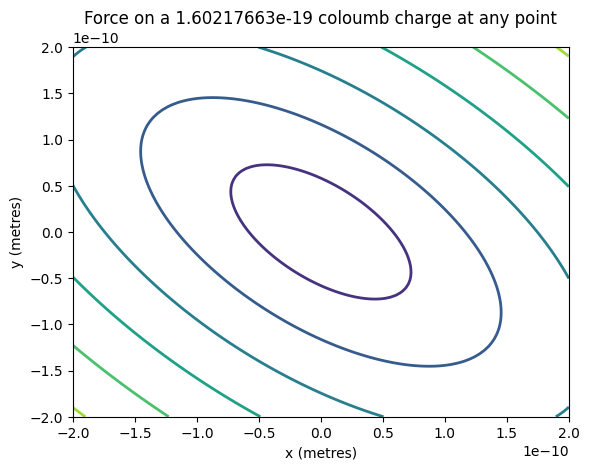

In [7]:
# Part c

import numpy as np;
from matplotlib import pyplot as mpl;

e = 1.60217663E-19; # magnitude of charge of an electron
epsilon0 = 8.8541878128E-12; # permittivity of free space

# Defining the charges that exist in the space in the format [[x, y], charge]
# x and y would have been stored together as a tuple however np.array considers it to be hence non-consistent dimensions
charges = np.array([[-1, -1, e], [1, 1, e]]);

# Defining the x and y points
N = 101;
x = np.linspace(-2E-10, 2E-10, N);
y = np.linspace(-2E-10, 2E-10, N);

# Defining the 2D grid
xx, yy = np.meshgrid(x, y);

# Calculating each vector field created by each charge
qi = e;
Fi_x_List = [];
Fi_y_List = [];
for charge in charges:
    rij_x = xx - charge[0];
    rij_y = yy - charge[1];
    rij_magnitude = np.sqrt(rij_x ** 2 + rij_y ** 2);
    rij_x_normalised = rij_x / rij_magnitude;
    rij_y_normalised = rij_y / rij_magnitude;

    Fi_x = ((qi * charge[2]) / (4 * np.pi * epsilon0)) * (rij_x_normalised / (rij_magnitude ** 2));
    Fi_y = ((qi * charge[2]) / (4 * np.pi * epsilon0)) * (rij_y_normalised / (rij_magnitude ** 2));

    if (np.amin(rij_magnitude) == 0):
        print (Fi_x[4,4])

    Fi_x_List.append(Fi_x);
    Fi_y_List.append(Fi_y);

# Summing all vector fields to create the final field
Fi_x_Sum = sum(Fi_x_List);
Fi_y_Sum = sum(Fi_y_List);

# Calculating the true final vector field
Fi = np.sqrt(Fi_x_Sum ** 2 + Fi_y_Sum ** 2);

# Create and plot contour
CS = mpl.contour(xx, yy, Fi, linewidths = 2)
mpl.xlabel("x (metres)")
mpl.ylabel("y (metres)")
mpl.title(f"Force on a {qi} coloumb charge at any point")

mpl.show()

# NOTE
# If area the graph is zoomed in on includes a charge, the contour lines will only appear incredibly tinily at the centre.
# This is because the force spikes to infinity as distance to a charge tends to 0.
# There are only so many contours that can be made and it does it over the area of largest variety; that means it only appears very very close to a point charge.